In [96]:
import pandas as pd

In [97]:
df = pd.read_csv('/content/sales_data_1.csv')

In [98]:
df

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


1.**Overall gross margin for their business**

In [99]:
# Total Revenue
df['Total Revenue'] = df['Selling price'] * df['Quantity sold']

# Total Cost
df['Total Cost'] = df['Buying price'] * df['Quantity sold']

# Gross Margin
gross_margin = df['Total Revenue'].sum() - df['Total Cost'].sum()
print("Overall Gross Margin: {:.2f}".format(gross_margin))


Overall Gross Margin: 31482.75


In [100]:
df

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold,Total Revenue,Total Cost
0,21/08/23,Vendor6,72.11,Customer7,91.58,44,4029.52,3172.84
1,21/08/23,Vendor4,75.08,Customer7,83.71,17,1423.07,1276.36
2,21/08/23,Vendor7,83.93,Customer2,103.76,15,1556.40,1258.95
3,21/08/23,Vendor7,52.01,Customer3,64.53,7,451.71,364.07
4,21/08/23,Vendor2,98.91,Customer5,140.92,1,140.92,98.91
...,...,...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18,1574.10,1166.76
66,27/08/23,Vendor8,88.79,Customer3,105.59,5,527.95,443.95
67,27/08/23,Vendor5,63.30,Customer5,92.92,32,2973.44,2025.60
68,27/08/23,Vendor5,94.06,Customer5,125.67,4,502.68,376.24


2. **Profitable Vendor**

In [101]:
# Group by vendor and calculate profit for each vendor
vendor_profit = df.groupby('Firm bought from')['Total Revenue'].sum() - df.groupby('Firm bought from')['Total Cost'].sum()

# Find the vendor with the highest profit
most_profitable_vendor = vendor_profit.idxmax()
print("Most Profitable Vendor: ", most_profitable_vendor)

Most Profitable Vendor:  Vendor4


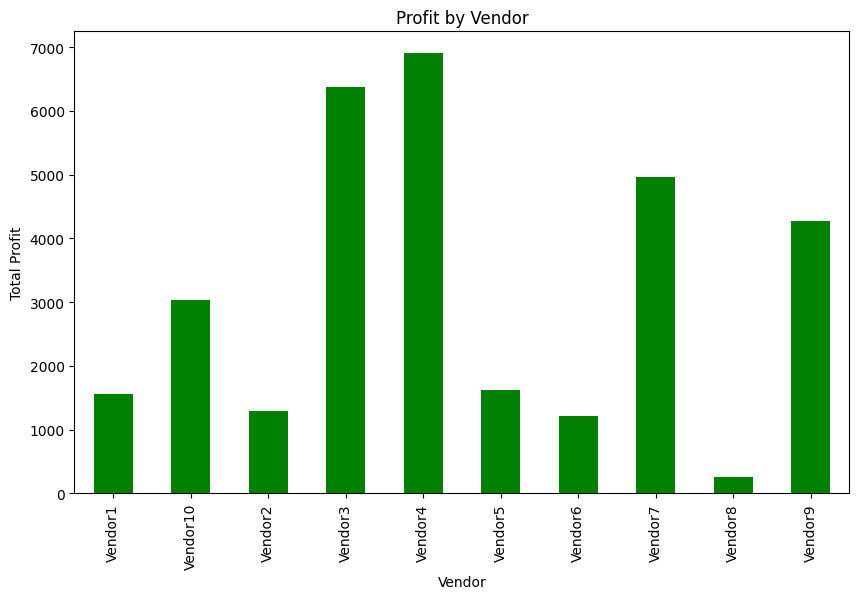

In [133]:
import matplotlib.pyplot as plt
# Plot the profit of each vendor
plt.figure(figsize=(10, 6))
vendor_profit.plot(kind='bar', color='g')
plt.xlabel('Vendor')
plt.ylabel('Total Profit')
plt.title('Profit by Vendor')
plt.show()

3. **Least Profitable**

In [102]:
# Group by customer and calculate profit for each customer
customer_profit = df.groupby('Customer')['Total Revenue'].sum() - df.groupby('Customer')['Total Cost'].sum()

# Find the customer with the lowest profit
least_profitable_customer = customer_profit.idxmin()
print("Least Profitable Customer: ", least_profitable_customer)


Least Profitable Customer:  Customer3


4. **Day of the week that was most profitable for them**

In [103]:
df['Date'].dtype

dtype('O')

In [104]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [105]:
df['Date'].dtype

dtype('<M8[ns]')

In [106]:
# Calculate the day of the week
df['Day of Week'] = df['Date'].dt.dayofweek

# Group by day of the week and calculate profit for each day
day_of_week_profit = df.groupby('Day of Week')['Total Revenue'].sum() - df.groupby('Day of Week')['Total Cost'].sum()

# Find the day of the week with the highest profit
most_profitable_day = day_of_week_profit.idxmax()
print("Most Profitable Day of the Week: ", most_profitable_day)


Most Profitable Day of the Week:  0


**Monday is having the most profitble day of the week**

5. **Day of the week that was the least profitable for them**

In [107]:
# Find the day of the week with the lowest profit
least_profitable_day = day_of_week_profit.idxmin()
print("Least Profitable Day of the Week: ", least_profitable_day)


Least Profitable Day of the Week:  6


**Sunday is the least profitable day of the week**

6. **3-day average of the daily gross profit from the sales_data_2.csv**

In [108]:
df2 = pd.read_csv("/content/sales_data_2.csv")

In [109]:
df2['Total Revenue'] = df2['Selling price'] * df2['Quantity sold']
df2['Total Cost'] = df2['Buying price'] * df2['Quantity sold']
df2['Gross Profit'] = df2['Total Revenue'] - df2['Total Cost']
df2['3-Day Avg Gross Profit'] = df2['Gross Profit'].rolling(3).mean()

In [110]:
df2

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Total Revenue,Total Cost,Gross Profit,3-Day Avg Gross Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,4029.52,3172.84,856.68,NaN
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,1423.07,1276.36,146.71,NaN
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,1556.40,1258.95,297.45,433.613333
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,451.71,364.07,87.64,177.266667
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,140.92,98.91,42.01,142.366667
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18,1574.10,1166.76,407.34,552.863333
66,2023-08-27,Vendor8,88.79,14,Customer3,105.59,5,527.95,443.95,84.00,552.070000
67,2023-08-27,Vendor5,63.30,81,Customer5,92.92,32,2973.44,2025.60,947.84,479.726667
68,2023-08-27,Vendor5,94.06,18,Customer5,125.67,4,502.68,376.24,126.44,386.093333


7. **The 3-day mean is varying from 18 to 1673 and there are  clear spikes in the variation on 3 day basis**

In [111]:
df2['3-Day Avg Gross Profit']


0            NaN
1            NaN
2     433.613333
3     177.266667
4     142.366667
         ...    
65    552.863333
66    552.070000
67    479.726667
68    386.093333
69    366.720000
Name: 3-Day Avg Gross Profit, Length: 70, dtype: float64

In [112]:
df2['3-Day Avg Gross Profit'].min()


18.25

In [113]:
df2['3-Day Avg Gross Profit'].max()

1673.4699999999996

**8**

In [114]:
vendor_profit = df2.groupby('Firm bought from')['Gross Profit'].sum()

 **8a. The vendor 8  is  having the lowest gross profit compared to other vendors and it will not affect the overall business firing this vendor**

In [115]:
vendor_profit

Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: Gross Profit, dtype: float64

In [116]:
customer_profit = df2.groupby('Customer')['Gross Profit'].sum()

**8b. After anlayzing the profit through customers. Letting go of any customer will affect the business because they are all potential customers**

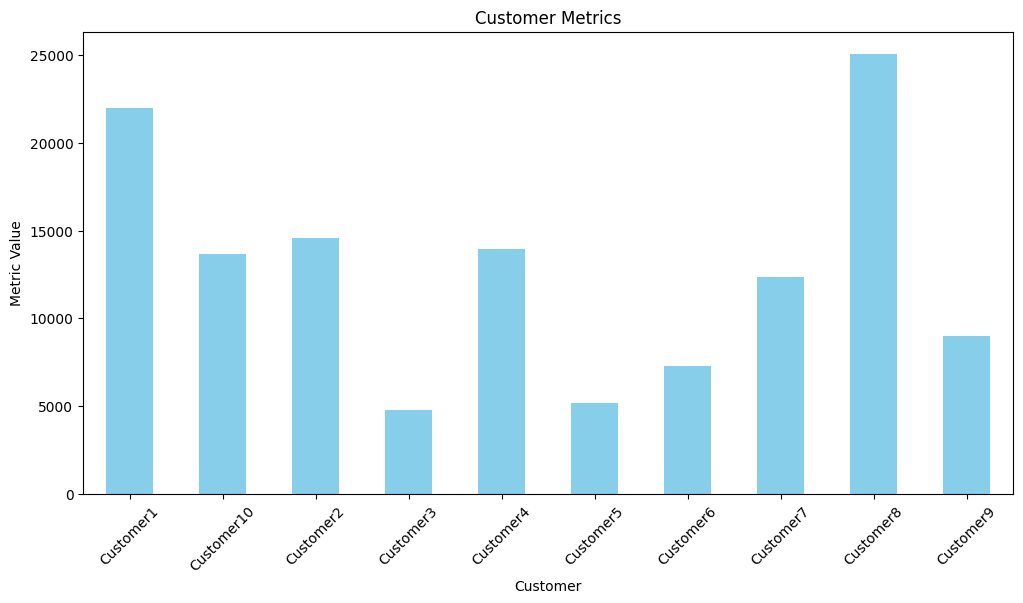

In [135]:
import matplotlib.pyplot as plt

# Group by customer and calculate a relevant metric (e.g., total revenue or gross profit)
customer_metric = df2.groupby('Customer')['Total Revenue'].sum()  # You can change 'Total Revenue' to the metric of your choice

# Create a bar chart to visualize customer data
plt.figure(figsize=(12, 6))
customer_metric.plot(kind='bar', color='skyblue')
plt.xlabel('Customer')
plt.ylabel('Metric Value')
plt.title('Customer Metrics')
plt.xticks(rotation=45)
plt.show()

In [117]:
customer_profit

Customer
Customer1     5310.57
Customer10    3692.44
Customer2     4215.67
Customer3     1055.05
Customer4     3337.37
Customer5     1315.28
Customer6     1930.76
Customer7     2197.62
Customer8     6498.91
Customer9     1929.08
Name: Gross Profit, dtype: float64

9. **The 25th, 50th (median), and 75th percentiles for both buying and selling prices**

In [118]:
percentiles = [25, 50, 75]
buying_price_percentiles = df2['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = df2['Selling price'].quantile([0.25, 0.5, 0.75])

In [119]:
buying_price_percentiles

0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

In [120]:
selling_price_percentiles

0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64

10

**Below 25th Percentile Frequency (18 times): This means that in 18 instances in the dataset, the buying or selling price of Sapota was cheaper compared to most other prices in the data. It suggests that, in those cases, they offered Sapota at a relatively lower price.**

**Above 75th Percentile Frequency (21 times): This indicates that in 21 instances in the dataset, the buying or selling price of Sapota was more expensive compared to most other prices in the data. It suggests that, in those cases, they sold Sapota at a relatively higher price.**

In [121]:
below_25th_percentile = (df2['Buying price'] < buying_price_percentiles[0.25]) | (df2['Selling price'] < selling_price_percentiles[0.25])
above_75th_percentile = (df2['Buying price'] > buying_price_percentiles[0.75]) | (df2['Selling price'] > selling_price_percentiles[0.75])

print("Below 25th percentile frequency:", below_25th_percentile.sum())
print("Above 75th percentile frequency:", above_75th_percentile.sum())

Below 25th percentile frequency: 18
Above 75th percentile frequency: 21


11

**As you can see vendor 4 is having high profit considering other vendors and thats why Bharath is saying to honor vendor 4 and after honoring him the there is a chance in increase of the gross margin and he can be an asset to the business**

In [122]:
vendor_profit

Firm bought from
Vendor1     1555.59
Vendor10    3040.62
Vendor2     1296.98
Vendor3     6370.67
Vendor4     6903.31
Vendor5     1616.14
Vendor6     1217.95
Vendor7     4961.05
Vendor8      253.74
Vendor9     4266.70
Name: Gross Profit, dtype: float64

12. **Max gross margin the firm could have in that branch**

In [123]:
# Find the vendor with the highest total profit
strategic_vendor = vendor_profit.idxmax()
max_margin = vendor_profit.max()
print("Vendor with Highest Gross Margin:", strategic_vendor)
print("Max Margin of that Vendor: {:.2f}".format(max_margin))


Vendor with Highest Gross Margin: Vendor4
Max Margin of that Vendor: 6903.31


13. **Increaing and decreasing the price by 1 and analyzing the chnages**

In [124]:
# Price Change Increase
price_change = 1

# Calculate the initial total quantity sold
initial_quantity_sold = df2['Quantity sold'].sum()

# Calculate the total quantity sold after increasing the price
df2['New Selling Price'] = df2['Selling price'] + price_change
new_quantity_sold = df2['New Selling Price'] * df2['Quantity sold']
new_total_quantity_sold = new_quantity_sold.sum()

# Calculate the percentage change in quantity sold
percentage_change_quantity_sold = ((new_total_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100

# Calculate the percentage change in price
percentage_change_price = (price_change / df2['Selling price'].mean()) * 100

# Calculate price elasticity
i_elasticity = percentage_change_quantity_sold / percentage_change_price
print("Change in price of Sapota for that Branch icreasing by 1: {:.2f}".format(i_elasticity))


Change in price of Sapota for that Branch icreasing by 1: 5566.55


In [125]:
# Price Change Increase
price_change = 1

# Calculate the initial total quantity sold
initial_quantity_sold = df2['Quantity sold'].sum()

# Calculate the total quantity sold after increasing the price
df2['New Selling Price'] = df2['Selling price'] - price_change
new_quantity_sold = df2['New Selling Price'] * df2['Quantity sold']
new_total_quantity_sold = new_quantity_sold.sum()

# Calculate the percentage change in quantity sold
percentage_change_quantity_sold = ((new_total_quantity_sold - initial_quantity_sold) / initial_quantity_sold) * 100

# Calculate the percentage change in price
percentage_change_price = (price_change / df2['Selling price'].mean()) * 100

# Calculate price elasticity
d_elasticity = percentage_change_quantity_sold / percentage_change_price
print("Change in price of Sapota for that Branch decreasing by 1: {:.2f}".format(d_elasticity))


Change in price of Sapota for that Branch decreasing by 1: 5418.72


In [126]:
Total_change = (i_elasticity - d_elasticity)
print(Total_change)

147.8265714285717


**Here there is a change of 147 Rs by increasing 1 Rs and decreasing 1 Rs**